# HW08 Q1. - Q10.

# Q1.

(a) A classification decision tree is a predictive model used to solve classification problems. By dividing dataset into subsets based on the values, a decision tree assigns class to each data points. Real-world applications where a decision tree might be useful are medical diagnosis, customer segmentation and spam detection. 

(b) The biggest difference between a decision tree and a multiple linear regression is that a decision tree is a model for classification to predict the categorical outcome and a multiple linear regression is a model for regression to predict continuous outcome. 

# Q2.

1. Accuracy measures the proportion of true results (both true positives and true negatives) in the population.

Real-world application scenario: Weather forecasting. The accuracy is important in weather forecast as the false positives and false negatives have fairly equal consequences. 

2. Sensitivity measures the proportion of actual positives that are correctly identified.

Real-world application scenario: Medical diagnosis. The sensitivity is important in medical diagnosis because false negative for life threatening diseases like cancer can be critical. 

3. Specificity measures the proportion of actual negatives that are correctly identified.

Real-world application scenario: Spam detection. The specificity is important in spam detection because false positive for important emails can be critical. 

4. Precision measures the proportion of positive identifications that were actually correct.

Real-world application scenario:Fraud detection. The precision is important in fraud detection because false positive of transactions can cause inconvinience of customers. 

# Q3.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove columns 'Weight_oz', 'Width', and 'Height'
ab_reduced = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)

# Step 2: Drop all remaining rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Set the appropriate data types using .loc to avoid the warning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
ab_reduced_noNaN.head()

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


In [9]:
#Data Summarization

# Check the structure and data types of the dataset
print("\nData types and non-null counts:")
print(ab_reduced_noNaN.info())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(ab_reduced_noNaN.describe())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None

Summary statistics for numerical columns:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673

# Q4.

In [26]:
# Set a random seed for reproducibility
random_seed = 42

# Shuffle and split the data into 80% training and 20% testing
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8, random_state=random_seed)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Display the number of rows in each set
print("Number of rows in the training set:", len(ab_reduced_noNaN_train))
print("Number of rows in the testing set:", len(ab_reduced_noNaN_test))

Number of rows in the training set: 255
Number of rows in the testing set: 64


In [27]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Define the target variable (y) and feature (X)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Predicting if 'Hard_or_Paper' is 'H' (Hardcover)
X = ab_reduced_noNaN_train[['List Price']]  # Using 'List Price' as the feature

# Initialize the classifier with a maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

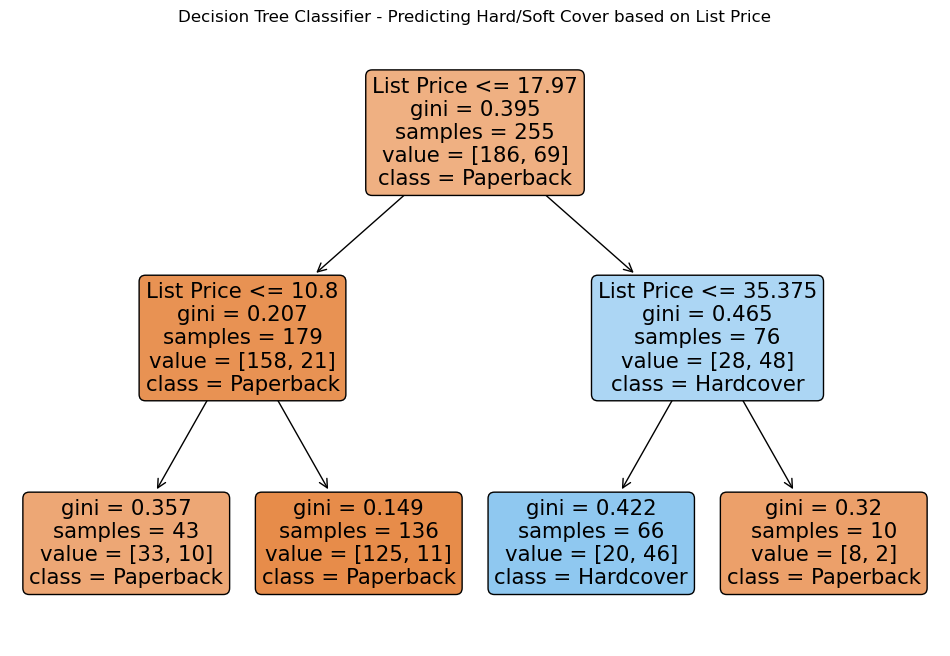

In [28]:
# Import the necessary function for plotting the tree
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.title("Decision Tree Classifier - Predicting Hard/Soft Cover based on List Price")
plt.show()

### The first node asks if the list price is smaller than 17.97 if yes we check if its smaller than 10.8 and if no we check if its smaller than 35.375. Through this process we get 4 leaves as a result.

# Q5.

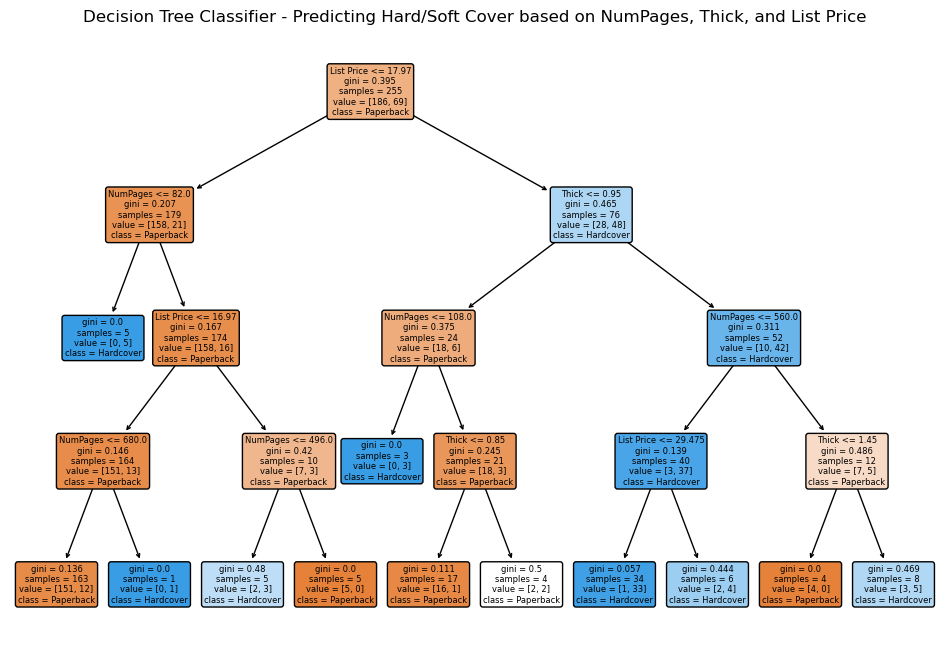

In [16]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the target variable (y) and the updated features (X)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target: hardcover or not
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, List Price

# Initialize the classifier with a maximum depth of 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier on the data
clf2.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardcover'], rounded=True)
plt.title("Decision Tree Classifier - Predicting Hard/Soft Cover based on NumPages, Thick, and List Price")
plt.show()

### This time we are using tree different columns 'NumPages', 'Thick', 'List Price' as thresholds. Each node provides a threshold to separate the dataset and by repeating the procedure we can classify the data points. 

# Q6.

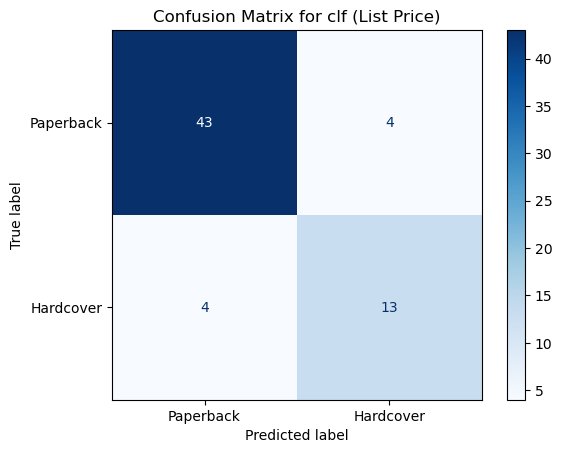

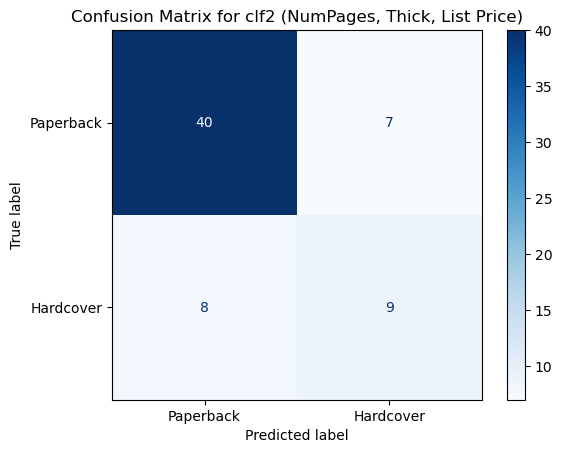

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the test data for clf (DecisionTreeClassifier with 'List Price')
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])

# Predict the test data for clf2 (DecisionTreeClassifier with 'NumPages', 'Thick', 'List Price')
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']])

# Get the true labels from the test set (converted to binary)
y_true = ab_reduced_noNaN_test['Hard_or_Paper'].apply(lambda x: 1 if x == 'H' else 0)

# Confusion Matrix for clf
cm_clf = confusion_matrix(y_true, y_pred_clf)

# Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

# Display Confusion Matrices for clf and clf2
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for clf (List Price)")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for clf2 (NumPages, Thick, List Price)")
plt.show()

In [19]:
# Sensitivity, Specificity, and Accuracy for clf
TP_clf, FN_clf, FP_clf, TN_clf = cm_clf.ravel()
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = accuracy_score(ab_reduced_noNaN_test['Hard_or_Paper'].apply(lambda x: 1 if x == 'H' else 0), y_pred_clf)

# Sensitivity, Specificity, and Accuracy for clf2
TP_clf2, FN_clf2, FP_clf2, TN_clf2 = cm_clf2.ravel()
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = accuracy_score(ab_reduced_noNaN_test['Hard_or_Paper'].apply(lambda x: 1 if x == 'H' else 0), y_pred_clf2)

# Display results
print(f"Performance of clf (with List Price):")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}")
print("\n")

print(f"Performance of clf2 (with NumPages, Thick, and List Price):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")

Performance of clf (with List Price):
Sensitivity: 0.9149
Specificity: 0.7647
Accuracy: 0.8750


Performance of clf2 (with NumPages, Thick, and List Price):
Sensitivity: 0.8511
Specificity: 0.5294
Accuracy: 0.7656


# Q7.

ConfusionMatrixDisplay(<br>
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, <br>
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), <br>
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()<br>
ConfusionMatrixDisplay(<br>
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good,<br> 
                     clf.predict(<br>
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), <br>
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()<br>
                     
The different features that the matrices are using are the differences between the two confusion matrices above. First matrix is only using 'List Price' as a feature but the second matrix uses 'NumPages','Thick','List Price' as features. The previous clf and clf2 are better because they went through the training of the model. We splited the dataset into 80:20 and trained the model with the training set. Using the trained model to the test model will allow more generalizability. 

# Q8.

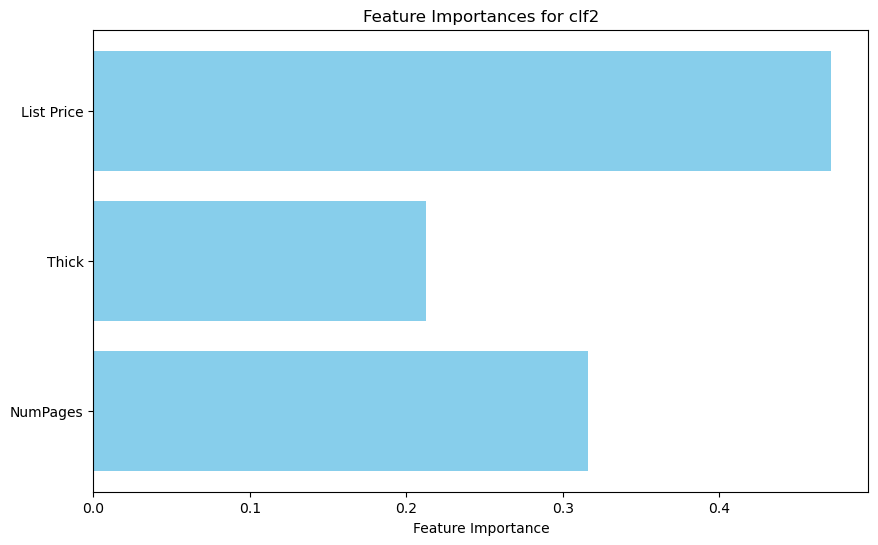

The most important feature is 'List Price' with an importance of 0.4716.


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances
importances = clf2.feature_importances_

# Get the feature names
feature_names = clf2.feature_names_in_

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2')
plt.show()

# Report which predictor is most important
most_important_feature = feature_names[np.argmax(importances)]
most_important_value = np.max(importances)

print(f"The most important feature is '{most_important_feature}' with an importance of {most_important_value:.4f}.")

# Q9.

Coefficients in linear model regression can be interpreted as the relationship between the predictor and outcome variables. Whether the variables are categorical or continuous, the coefficients play role in predicting the outcome when inputted in the formula that we are using. However feature importances in decision trees do not directly contribute to predicting the outcome. They are just a measure of how much each features were influential in making decisions. 

Here's a summary of our interaction from the beginning to the end:

1. **Introduction to Topics**: You started by asking about classification decision trees, linear regression, and model evaluation metrics such as accuracy, sensitivity, specificity, and precision. I explained the differences in how decision trees and linear regression make predictions, as well as the key evaluation metrics used to assess model performance.

2. **Exploratory Data Analysis (EDA)**: You shared a dataset, and I assisted you with various steps for data cleaning and exploration, including removing certain columns, handling missing data, and setting appropriate data types for specific features.

3. **Model Building**: We progressed to building decision tree models (`clf` and `clf2`), where `clf` used just the `List Price` feature to classify books as hardcover or paperback, and `clf2` incorporated additional features (`NumPages`, `Thick`, `List Price`). I helped you visualize decision trees and interpret the predictions they made.

4. **Confusion Matrices and Model Evaluation**: You generated confusion matrices for `clf` and `clf2` models on the training and testing datasets, and I explained how to interpret these matrices in terms of accuracy, sensitivity, and specificity. We compared these models to simpler versions of classification tasks to understand why using multiple features (like in `clf2`) often leads to better performance.

5. **Feature Importances in Decision Trees**: You inquired about visualizing feature importances in a decision tree model (`clf2`). I provided a solution to visualize and interpret the importance of different features in making predictions, and I explained how feature importances differ from the interpretation of coefficients in linear regression.

6. **Final Summary**: Finally, I summarized the differences between interpreting coefficients in linear regression and feature importances in decision trees, highlighting how each provides insight into the model’s behavior but in different ways.

This entire conversation helped clarify concepts related to decision trees, linear regression, model evaluation, and feature analysis, providing a deeper understanding of how machine learning models work.

https://chatgpt.com/share/673be058-38e4-8009-8ff1-9dacf1debc2a